In [74]:
import os
import earthpy as et
import matplotlib.pyplot as plt
import requests
import wget
import xarray as xr

In [ ]:
base_path = '/Users/jwitte/earth-analytics/data/capstone/gpm/'
url = 'https://gpm1.gesdisc.eosdis.nasa.gov/daac-bin/OTF/HTTP_services.cgi?FILENAME=%2Fdata%2FGPM_L3%2FGPM_3IMERGDL.06%2F2007%2F01%2F3B-DAY-L.MS.MRG.3IMERG.20070110-S000000-E235959.V06.nc4&FORMAT=bmM0Lw&BBOX=36.638%2C-109.468%2C41.428%2C-101.646&LABEL=3B-DAY-L.MS.MRG.3IMERG.20070110-S000000-E235959.V06.nc4.SUB.nc4&SHORTNAME=GPM_3IMERGDL&SERVICE=L34RS_GPM&VERSION=1.02&DATASET_VERSION=06'


#r = et.data.get_data(url=url)


#r = requests.get(url)

#with open(base_path + url.split('&')[-5].split('LABEL=')[1], 'wb') as f:
#    f.write(r.content)

#open(base_path + url.split('&')[-5].split('LABEL=')[1], 'wb').write(r.content)
    
#urllib.request.urlretrieve(url, url.split('&')[-5].split('LABEL=')[1]) 
# url.split('&')[-5].split('LABEL=')[1]

wget.download(url, base_path + 'test.nc')

#base_path + url.split('&')[-5].split('LABEL=')[1]



In [ ]:
file = '/Users/jwitte/earth-analytics/data/capstone/gpm/subset_GPM_3IMERGDL_06_20220403_161622.txt'
with open(file) as f:
    contents = f.readlines()
f.close()

for url in contents:
    r = requests.get(url)
    open(base_path + url.split('&')[-5].split('LABEL=')[1], 'wb').write(r.content)
    #wget.download(url, base_path + url.split('&')[-5].split('LABEL=')[1]) 
    print(url.split('&')[-5].split('LABEL=')[1])


In [150]:
file = '/Users/jwitte/earth-analytics/data/capstone/gpm/3B-DAY-L.MS.MRG.3IMERG.20130915-S000000-E235959.V06.nc4.SUB.nc4'
file2 = '/Users/jwitte/earth-analytics/data/capstone/gpm/3B-DAY-L.MS.MRG.3IMERG.20130914-S000000-E235959.V06.nc4.SUB.nc4'

data = xr.open_dataset(file).squeeze()
data['precipitationCal']

<xarray.DataArray 'precipitationCal' (lon: 76, lat: 44)>
array([[ 3.01913 ,  2.249942,  0.806082, ...,  5.595604,  1.149362,  0.214209],
       [ 3.138402,  3.5509  ,  2.650283, ...,  1.689049,  1.140222,  0.204345],
       [ 3.174291,  5.415587,  5.726942, ...,  1.797097,  1.101162,  1.085879],
       ...,
       [ 6.329593,  1.01978 ,  0.85415 , ..., 22.23432 , 18.770613, 18.279638],
       [12.159876,  3.095958,  0.920953, ..., 21.709246, 17.945433, 16.479696],
       [11.352453, 12.05271 ,  0.329922, ..., 21.960636, 19.42392 , 16.725004]],
      dtype=float32)
Coordinates:
    time     datetime64[ns] 2013-09-15
  * lon      (lon) float32 -109.3 -109.2 -109.1 -109.0 ... -102.0 -101.9 -101.8
  * lat      (lat) float32 36.85 36.95 37.05 37.15 ... 40.85 40.95 41.05 41.15
Attributes:
    long_name:  Daily accumulated precipitation (combined microwave-IR) estimate
    units:      mm

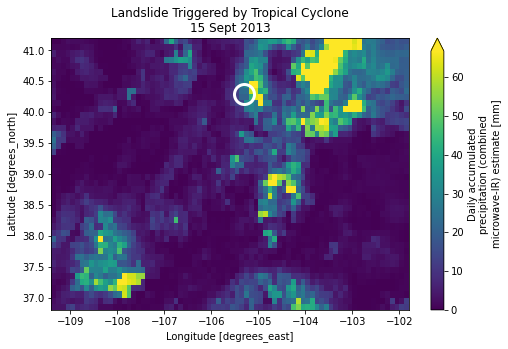

In [164]:
f, ax = plt.subplots(figsize=(8, 5))
data['precipitationCal'].plot(x='lon', y='lat', ax=ax, robust=True)


ax.plot([-105.3], [40.29350], 'o', color='white',
        markersize=20, fillstyle='none', markeredgewidth=3)

ax.set(title = 'Landslide Triggered by Tropical Cyclone\n15 Sept 2013')

# Adding text inside a rectangular box by using the keyword 'bbox'
#ax.text(39, -105.52900, 'Tropical Cyclone\nTrigger', fontsize=12,
#         color='white')
#         bbox=dict(facecolor='red', alpha=0.8))


# Saving figure
plot_output = os.path.join(et.io.HOME,
                           'earth-analytics',
                           'ea-python-2022-capstone', 'plots',
                           'gpm_tropical_cyclone_20130915.jpg')

plt.savefig(plot_output)